In [ ]:
#comparing GHI vs predGHI from 29.12.2022 
%%shell
jupyter nbconvert --to html /content/rms29_12.ipynb

[NbConvertApp] Converting notebook /content/rms29_12.ipynb to html
[NbConvertApp] Writing 380987 bytes to /content/rms29_12.html


In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
predicted_values = pd.read_csv("/content/drive/MyDrive/Colab/JAWAD/Updated_Model_New_Data/VALIDATION/06-01-2023/Predicted_ghi.csv", sep=';')
predicted_values

,Time,Predictions
0,2023-01-06 08:12:00,3.484753
1,2023-01-06 08:13:00,3.484753
2,2023-01-06 08:14:00,3.484753
3,2023-01-06 08:15:00,3.484753
4,2023-01-06 08:16:00,3.484753
...,...,...
474,2023-01-06 16:06:00,NaN
475,2023-01-06 16:07:00,NaN
476,2023-01-06 16:08:00,NaN
477,2023-01-06 16:09:00,NaN


In [7]:
#actual_values = pd.read_csv('GHI2112.csv', sep=';')
actual_values = pd.read_csv('/content/drive/MyDrive/Colab/JAWAD/Updated_Model_New_Data/VALIDATION/06-01-2023/GHI-data-2023-01-06.csv', sep=',')
actual_values['GHI'] = actual_values['GHI'].map(lambda x: x.rstrip('W/m²')).astype('float64')
actual_values


,Time,GHI
0,2023-01-06 08:12:00,2.10
1,2023-01-06 08:13:00,2.05
2,2023-01-06 08:14:00,2.29
3,2023-01-06 08:15:00,2.66
4,2023-01-06 08:16:00,3.26
...,...,...
474,2023-01-06 16:06:00,2.90
475,2023-01-06 16:07:00,2.41
476,2023-01-06 16:08:00,2.20
477,2023-01-06 16:09:00,2.00


In [10]:
# Now concatenating 18,19,21,22,23,24 and 25th days data for both lux, ghui we will merge them
final_df=predicted_values.merge(actual_values, how='inner', on='Time')
final_df.head()
final_df.shape

(479, 3)

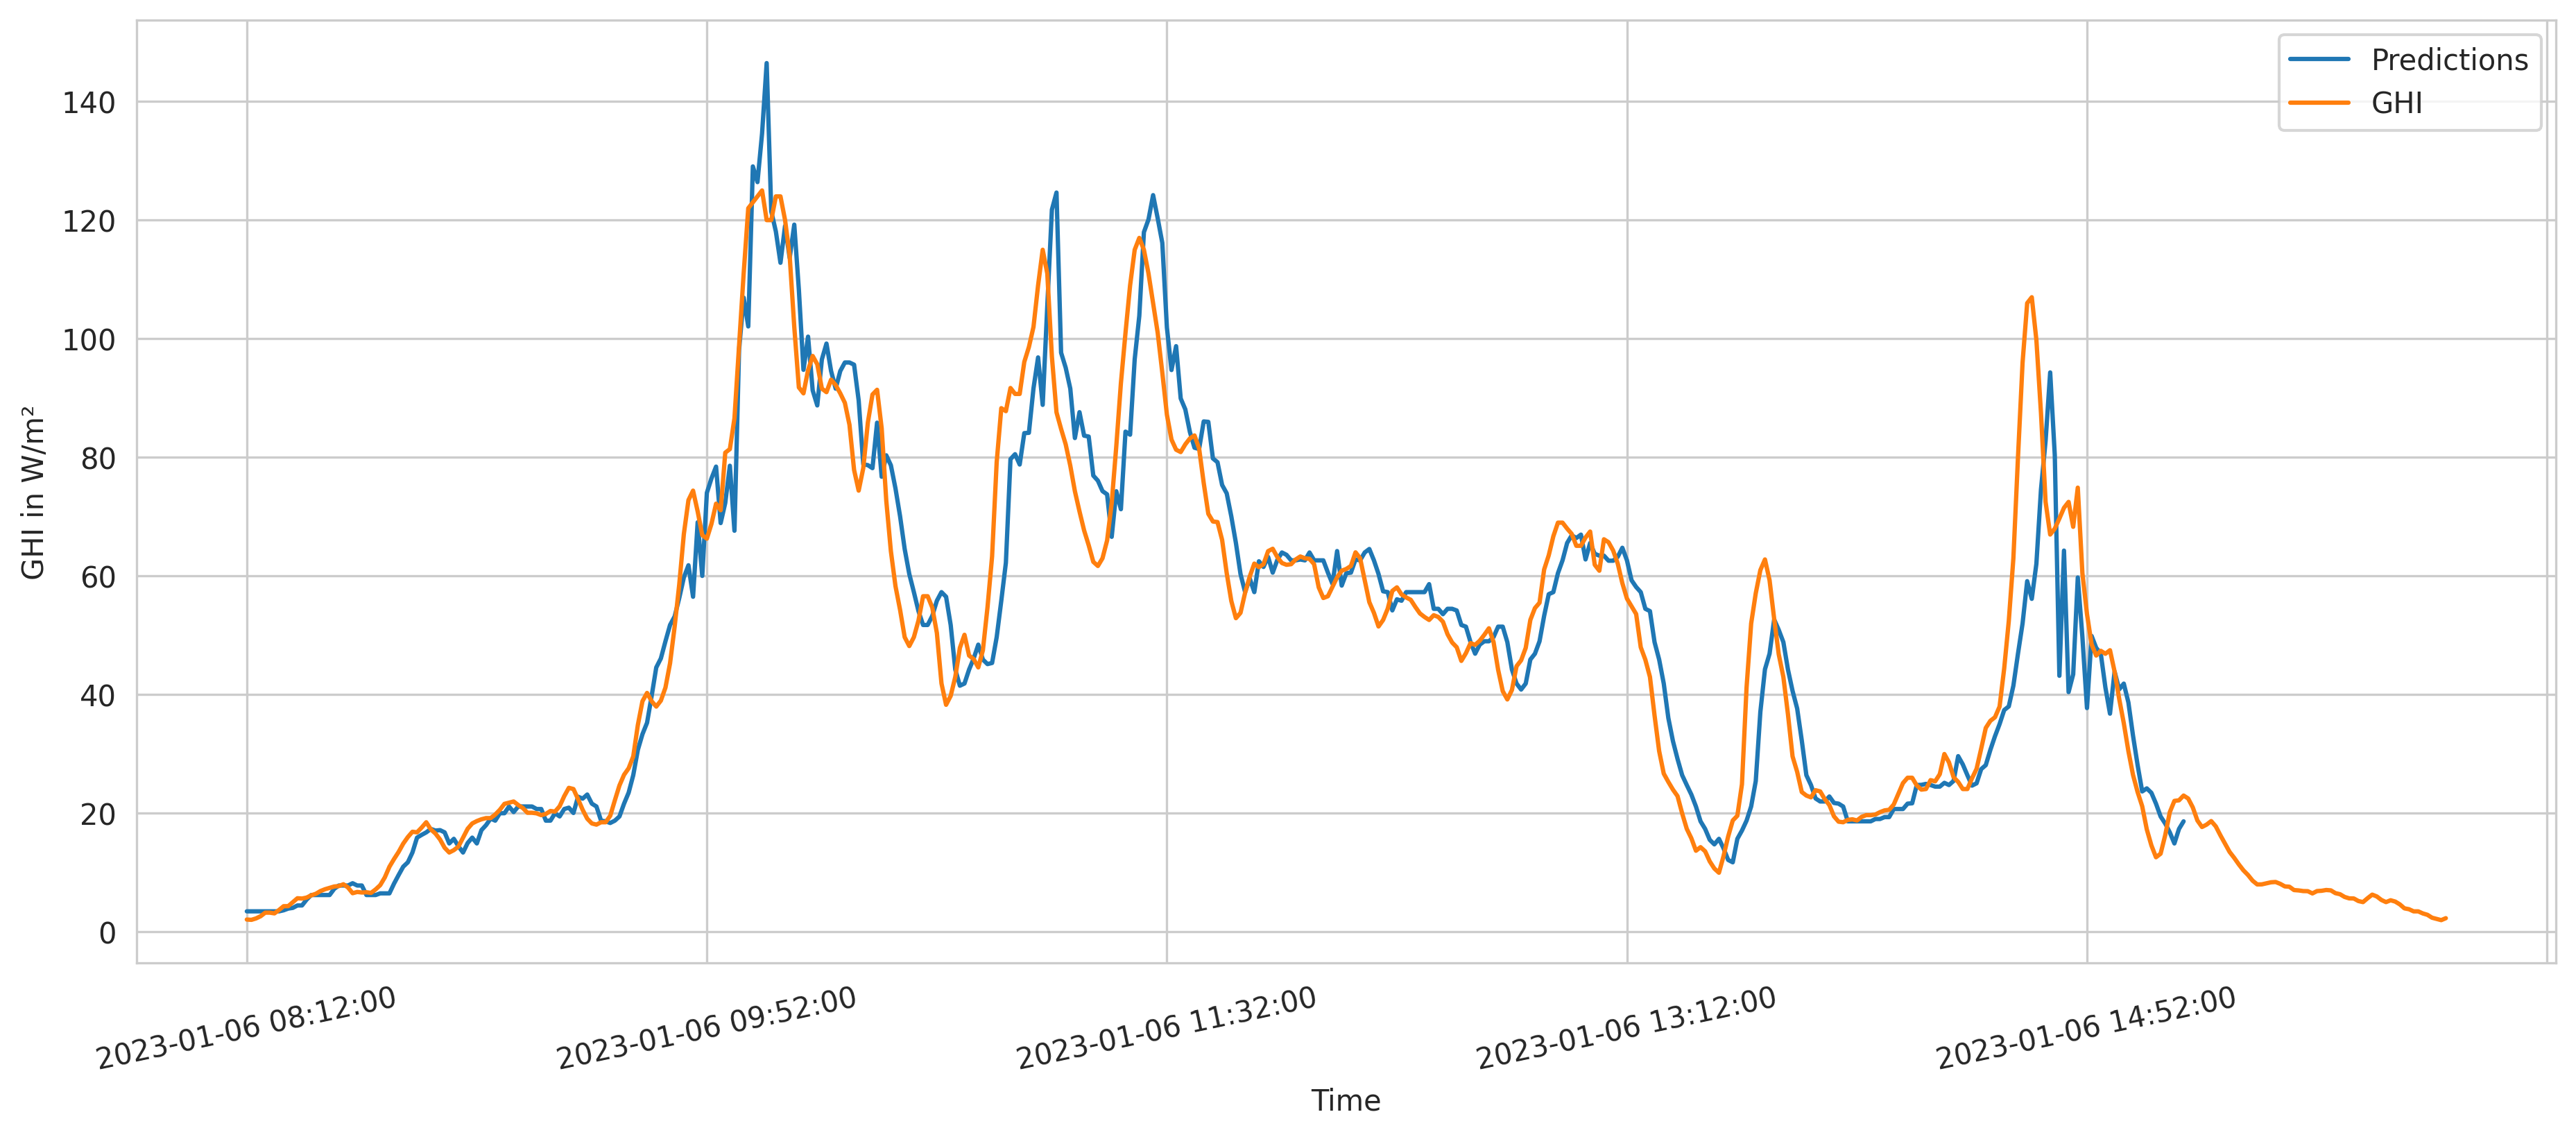

<Figure size 1800x1200 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

final_df.plot(x = 'Time', y=["Predictions", "GHI"], kind="line", figsize=(15, 6))

plt.xlabel('Time')
plt.ylabel('GHI in W/m²')
plt.xticks( rotation=12 )
plt.show()


fig = plt.figure()
fig.savefig('/content/drive/MyDrive/Colab/JAWAD/Updated_Model_New_Data/VALIDATION/06-01-2023/06-01-2023.png',  dpi=fig.dpi)


In [17]:
rmse = ((final_df["Predictions"] - final_df["GHI"]) ** 2).mean() ** .5
print("Root Mean Squared Error :", rmse)

Root Mean Squared Error : 10.14744333362927
